## DATA DIRI
2. Nama = DAFFA RAYHAN RIADI
3. Username = daffarayhanriadi
4. Email = daffarayhanriadi@gmail.com 
5. No. Telepon = +6285277116302
6. Kota Domisili = Purwokerto
7. Tempat Lahir = Kota Padangsidempuan - Sumatera Utara
8. Tanggal Lahir = 03 Oktober 2022
9. Jenis Kelamin = Laki-laki
10. Pendidikan Terakhir = SMA
11. Pekerjaan/Profesi saat ini = Pelajar/Mahasiswa
12. Perusahaan/Institusi saat ini = Institut Teknologi Telkom Purwokerto


## Import Library
Melakukan import beberapa library yang diperlukan

In [1]:
# import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier 

# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# from sklearn import metrics
# from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Data Loading
Melakukan Data Loading dengan [Dataset](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv) berikut ini.

In [2]:
url_dataset = 'https://raw.githubusercontent.com/Daffarr/proyek1MLTerapan/main/Dataset/coin_Bitcoin.csv'
df_bitcoin = pd.read_csv(url_dataset)
df_bitcoin

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


# Exploratory Data

###Variabel-variabel pada dataset adalah sebagai berikut:
* SNo: Nomor Seri atau Nomor Baris Pada Dataset
* Name: Nama mata uang kripto
* Symbol: Simbol mata uang kripto
* Date: Tanggal pencatatan data
* High : Harga tertinggi pada hari tertentu
* Low : Harga terendah pada hari tertentu
* Open : Harga pembukaan pada hari tertentu
* Close : Harga penutupan pada hari tertentu
* Volume : Volume transaksi pada hari tertentu
* Mastercap : Kapitalisasi pasar dalam USD

Pada kali ini fitur yang akan menjadi target kita adalah Close

# Mengecek Informasi Data

In [3]:
df_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


# Informasi Statistik dari Data
Data di bawah memiliki beberapa informasi statistik pada masing-masing kolom, antara lain:

* count adalah jumlah sampel pada data.
* mean adalah nilai rata-rata.
* std adalah standar deviasi.
* min yaitu nilai minimum setiap kolom.
* 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
* 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
* 75% adalah kuartil ketiga.
* Max adalah nilai maksimum

In [4]:
df_bitcoin.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


## Melihat data yang memiliki nilai 0 pada sample Data

In [5]:
a = (df_bitcoin.SNo == 0).sum()
b = (df_bitcoin.High == 0).sum()
c = (df_bitcoin.Low == 0).sum()
e = (df_bitcoin.Open == 0).sum()
f = (df_bitcoin.Close == 0).sum()
g = (df_bitcoin.Volume == 0).sum()
h = (df_bitcoin.Marketcap == 0).sum()


print("Nilai 0 di kolom SNo ada: ", a)
print("Nilai 0 di kolom High ada: ", b)
print("Nilai 0 di kolom Low ada: ", c)
print("Nilai 0 di kolom Open ada: ", e)
print("Nilai 0 di kolom Close ada: ", f)
print("Nilai 0 di kolom Volume ada: ", g)
print("Nilai 0 di kolom Marketcap ada: ", h)

Nilai 0 di kolom SNo ada:  0
Nilai 0 di kolom High ada:  0
Nilai 0 di kolom Low ada:  0
Nilai 0 di kolom Open ada:  0
Nilai 0 di kolom Close ada:  0
Nilai 0 di kolom Volume ada:  242
Nilai 0 di kolom Marketcap ada:  0


## Melihat data yang memiliki nilai null pada sample Data

In [6]:
df_bitcoin.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

## Melihat banyak baris dan kolom pada Dataset

In [7]:
df_bitcoin.shape

(2991, 10)

## Mengecek Data Yang Termasuk Dalam Outlier

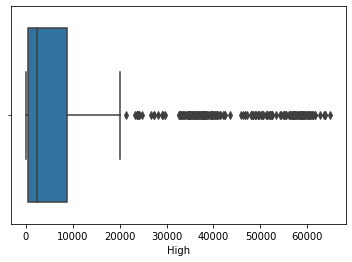

In [8]:
sns.boxplot(x=df_bitcoin['High'])

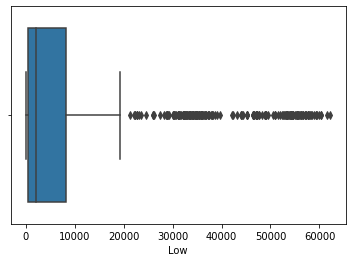

In [9]:
sns.boxplot(x=df_bitcoin['Low'])

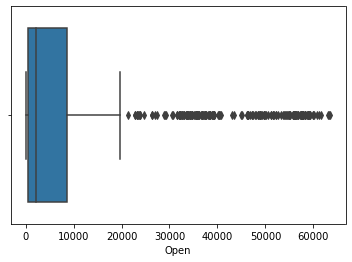

In [10]:
sns.boxplot(x=df_bitcoin['Open'])

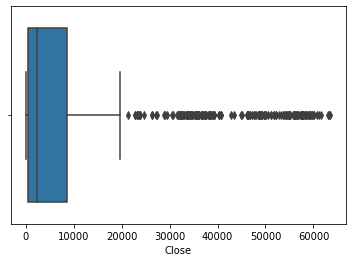

In [11]:
sns.boxplot(x=df_bitcoin['Close'])

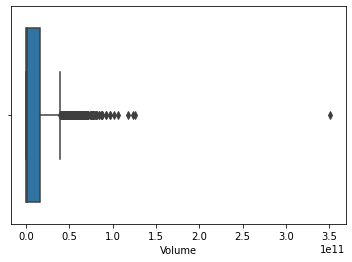

In [12]:
sns.boxplot(x=df_bitcoin['Volume'])

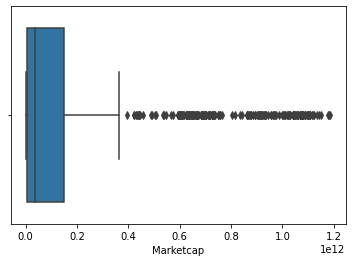

In [14]:
sns.boxplot(x=df_bitcoin['Marketcap'])

### IQR Method
Dapat dilihat pada visualisasi diatas dataset ini memiliki data outlier yang cukup banyak, maka untuk menghandle data outlier tersebut pada dataset ini akan menggunakan IQR Method yaitu dengan menghapus data yang berada diluar interquartile range.

In [15]:
Q1 = df_bitcoin.quantile(.25)
Q3 = df_bitcoin.quantile(.75)
IQR = Q3 - Q1

df_bitcoin = df_bitcoin[~((df_bitcoin < Q1 - 1.5 * IQR) | (df_bitcoin > Q3 + 1.5 * IQR)).any(axis=1)]

# Cek dataset setelah menghapus / drop data yang termasuk dalam outlier
df_bitcoin.shape

<ipython-input-15-ae0648585aca>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_bitcoin = df_bitcoin[~((df_bitcoin < Q1 - 1.5 * IQR) | (df_bitcoin > Q3 + 1.5 * IQR)).any(axis=1)]


(2696, 10)

Mengecek visualisasi data outlier kembali, apakah sudah terhapus atau belum, dan dapat dilihat pada visualisasi dibawah ini, dataset masih memiliki data outlier. Data outlier disini tidak akan dihapus dengan asumsi agar tidak menghilangkan keberagaman dari sample data.

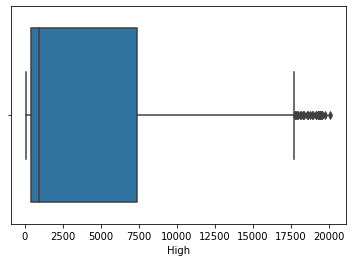

In [16]:
sns.boxplot(x=df_bitcoin['High'])

# Univariate Analysis

Kesimpulan yang menurut saya bisa dapat dilihat disini adalah kenaikan harga dari kripto bitcoin sebanding dengan penurunan sampel data.

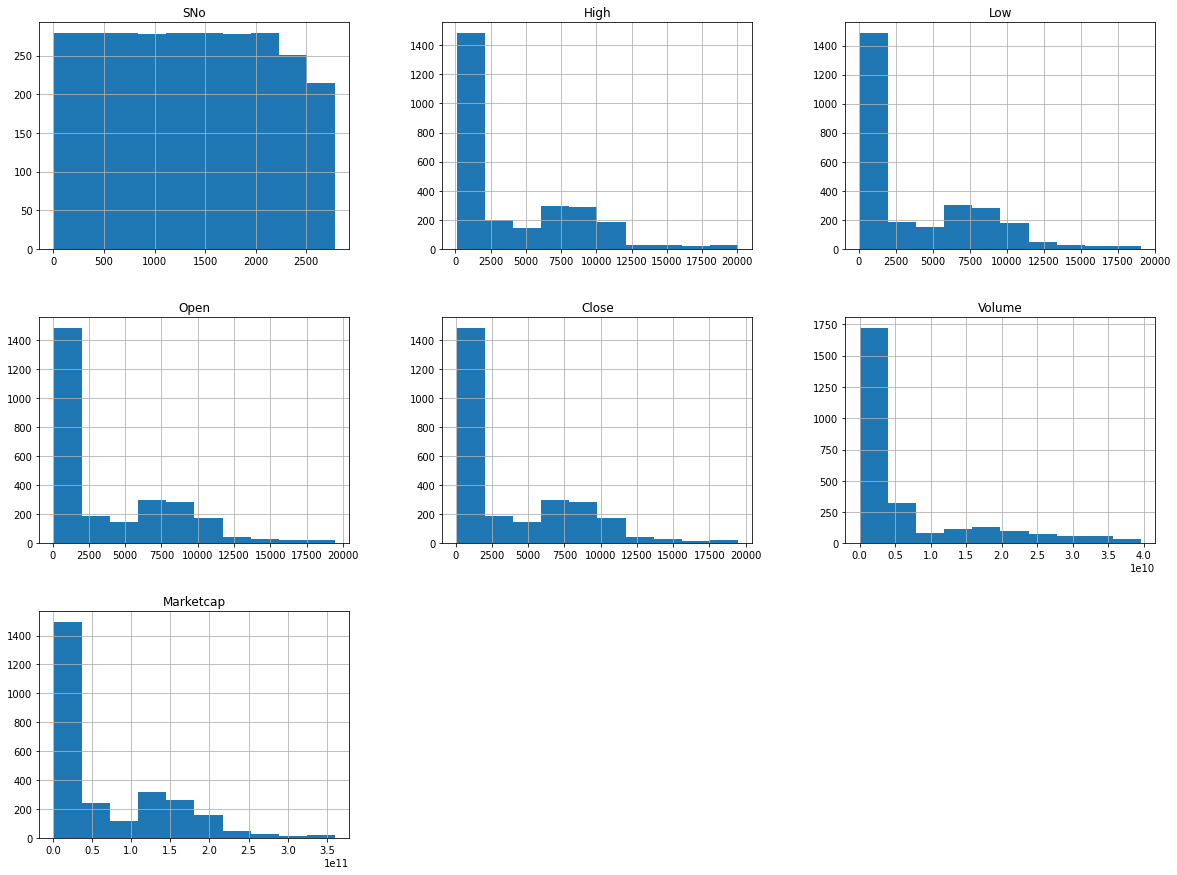

In [17]:
# Numerical features
hist_plot = df_bitcoin.hist(figsize=(20,15))

# Multivariate Analysis

##### Melalui Visualisasi dibawah ini dapat kita lihat bahwa fitur close memiliki korelasi yang tinggi atau baik dengan beberapa fitur yang ada, yakni High, Low, Open dan Marketcap. Sedangkan fitur volume dapat kita lihat memiliki korelasi yang cukup rendah.

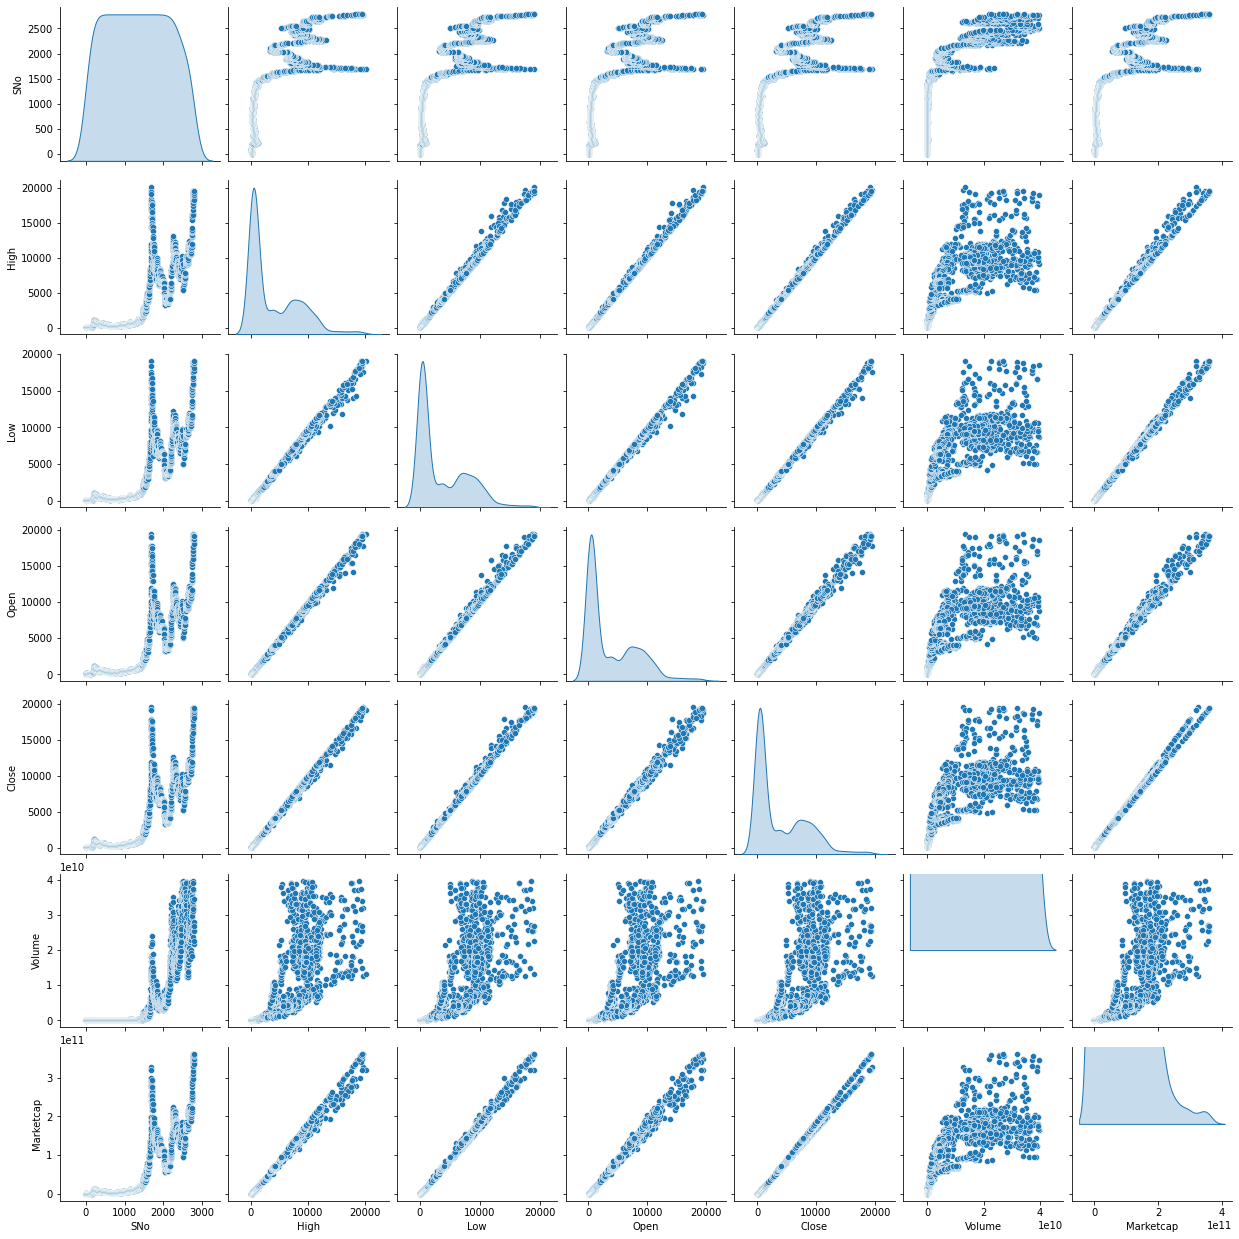

In [18]:
sns.pairplot(df_bitcoin, diag_kind = 'kde')
plt.show()

Disini dapat kita lihat secara detail korelasinya nya menggunakan angka, dapat kita lihat rata-rata korelasi yang ada dari fitur Close dengan fitur lain seperti High, Low, Open dan Marketcap itu mencapai angka 0.81, sedangkan volume mencapai angka 0.78, oleh karena itu dapat memungkinkan kita untuk menghapus fitur volume pada dataset ini.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

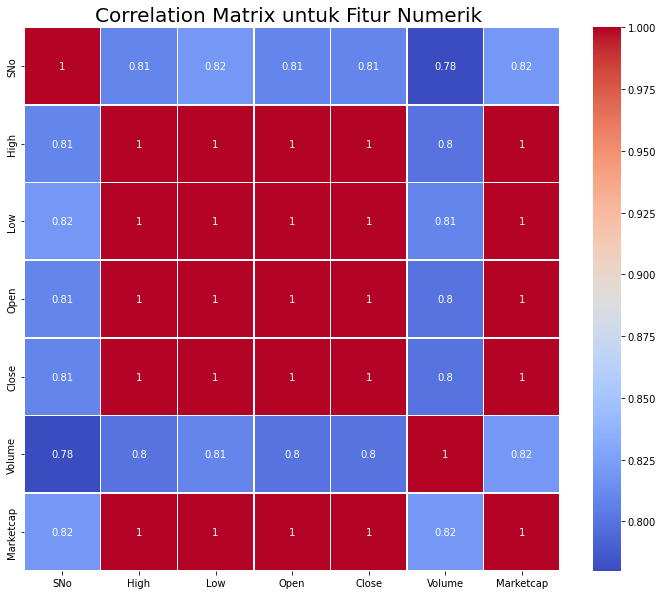

In [19]:
# Untuk mengevaluasi skor korelasinya, gunakan fungsi corr().
plt.figure(figsize=(12, 10))
correlation_matrix = df_bitcoin.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

## Data Preparation

### Menghapus Data Yang Tidak Diperlukan
Kolom data **Volume** dihapus karena memiliki korelasi yang rendah. Kemudian Kolom data seperti **(SNo, Name, Symbol, Date, Marketcap)** tidak diperlukan untuk pelatihan, karena data tersebut akan mengganggu model dalam mempelajari data. Karena isi dari data tersebut tidak memiliki value yang berarti untuk dipelajari oleh model.

In [20]:
df_bitcoin.drop(['SNo', 'Name', 'Symbol','Date','Marketcap', 'Volume'], axis = 1, inplace = True)
df_bitcoin

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,High,Low,Open,Close
0,147.488007,134.000000,134.444000,144.539993
1,146.929993,134.050003,144.000000,139.000000
2,139.889999,107.720001,139.000000,116.989998
3,125.599998,92.281898,116.379997,105.209999
4,108.127998,79.099998,106.250000,97.750000
...,...,...,...,...
2783,18268.452845,17619.532389,18263.929255,18058.903347
2784,18919.551228,18046.040724,18051.319990,18803.656870
2785,19381.535773,18734.332888,18806.766479,19142.382534
2786,19305.100443,19012.709408,19144.492460,19246.644341


### Split dataset

Membagi dataset menjadi data latih (x_train & y_train) dan data uji (x_test & y_test)

In [21]:
x = df_bitcoin.drop(['Close'], axis=1).values
y = df_bitcoin['Close'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print(len(x))
print(len(x_train))
print(len(x_test))

2696
2156
540


### Normalization Dataset
Melakukan transformasi pada data fitur fitur yang akan dipelajari oleh model menggunakan library MinMaxScaler ataupun StandardScaler. Setelah dibandingkan library MinMaxScaler memiliki akurasi sedikit lebih baik, sehingga pada kali ini menggunakan library tersebut.

In [22]:
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_train

In [23]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[0.19210878, 0.20087073, 0.19727509],
       [0.78496209, 0.78111891, 0.79408749],
       [0.02528484, 0.02698723, 0.02624003],
       ...,
       [0.01902741, 0.02008167, 0.01962679],
       [0.03270633, 0.02796215, 0.03224122],
       [0.01716355, 0.01847409, 0.01793156]])

In [23]:
# features=['High', 'Low', 'Open', 'Close']

## MODEL SELECTION
### Tuning Hyperparameters

Melakukan tuning hyperparameters untuk mendapatkan parameter dengan performa terbaik pada model.

In [24]:
models = pd.DataFrame(columns=['train_mse', 'test_mse'],
                      index=['KNN', 'RandomForestRegression', 'SVR'])

In [25]:
# Menggunakan Model Algoritma Support Vector Regression (SVR)
svr_model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C':     [1000, 10000, 100000],
    'gamma': [0.3, 0.03, 0.003]
}

svr_model_search = GridSearchCV(
    svr_model, 
    parameters,
    cv=5, 
    verbose=1,
    n_jobs=6,
)

svr_model_search.fit(x_train, y_train)
svr_model_best_params = svr_model_search.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [26]:
# Menggunakan Algoritma K-Neighbors Regression (KNN)
knn_model = KNeighborsRegressor()
parameters =  {
    'n_neighbors': range(1, 25),
}

knn_model_search = GridSearchCV(
  knn_model, 
  parameters, 
  cv=5,
  verbose=1, 
  n_jobs=6,
)

knn_model_search.fit(x_train, y_train)
knn_model_best_params = knn_model_search.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [27]:
# Menggunakan Model Algoritma Random Forest Regression (RFR)
rfr_model = RandomForestRegressor()
parameters =  {
    'n_estimators': range(1, 10),
    'max_depth': [16, 32, 64],
}

rfr_model_search = GridSearchCV(
  rfr_model, 
  parameters, 
  cv=5,
  verbose=1,
  n_jobs=6,
)
rfr_model_search.fit(x_train, y_train)
rfr_model_best_params = rfr_model_search.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [28]:
svr_model = SVR(
  C=svr_model_best_params["C"], 
  gamma=svr_model_best_params["gamma"], 
  kernel=svr_model_best_params['kernel']
)                          
svr_model.fit(x_train, y_train)

SVR(C=100000, gamma=0.3)

In [29]:
knn_model = KNeighborsRegressor(n_neighbors=knn_model_best_params["n_neighbors"])
knn_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [30]:
rfr_model = RandomForestRegressor(
  n_estimators=rfr_model_best_params["n_estimators"], 
  max_depth=rfr_model_best_params["max_depth"]
)
rfr_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=16, n_estimators=6)

In [31]:
x_test = scaler.transform(x_test)
x_test

array([[0.20158342, 0.20705315, 0.20724036],
       [0.41738809, 0.40731773, 0.42366824],
       [0.02908485, 0.03023209, 0.02950086],
       ...,
       [0.38102658, 0.39561985, 0.3865368 ],
       [0.31653592, 0.32574625, 0.32024786],
       [0.00331405, 0.00354638, 0.00332787]])

In [32]:
# Melakukan prediksi atas model yang telah dilatih
model_dict = {'KNN': knn_model, 'RandomForestRegression': rfr_model, 'SVR': svr_model}

for name, model in model_dict.items():
  models.loc[name, 'train_mse'] = mean_squared_error(
    y_true=y_train, 
    y_pred=model.predict(x_train)
  )
  models.loc[name, 'test_mse'] = mean_squared_error(
    y_true=y_test, 
    y_pred=model.predict(x_test)
  ) 

models

,train_mse,test_mse
KNN,12309.9332,22227.046939
RandomForestRegression,3938.253619,17906.167044
SVR,8329.656534,7033.950142


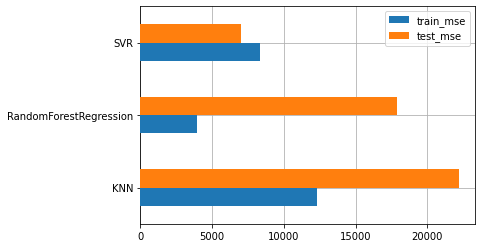

In [33]:
# Visualisasi dari prediksi yang telah dilakukan
fig, ax = plt.subplots()
models.sort_values(by='test_mse', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [34]:
test_data = x_test.copy()
predictions = {'y_true':y_test}
for name, model in model_dict.items():
  predictions['prediction_' + name] = model.predict(test_data)
 
predictions = pd.DataFrame(predictions)
predictions

,y_true,prediction_KNN,prediction_RandomForestRegression,prediction_SVR
0,4001.739990,4042.230663,4060.945083,4028.660139
1,8300.860352,7988.287405,8168.983073,8000.700543
2,650.879028,650.256862,655.031169,651.257182
3,8293.867741,8062.963169,7978.706404,8064.105303
4,973.817993,1037.600420,1024.639842,997.555087
...,...,...,...,...
535,285.337006,288.292428,287.876668,287.623992
536,595.812988,599.422137,599.222321,595.773780
537,7679.867204,7564.853671,7679.716153,7673.621152
538,6322.690000,6339.260000,6320.349829,6356.264586


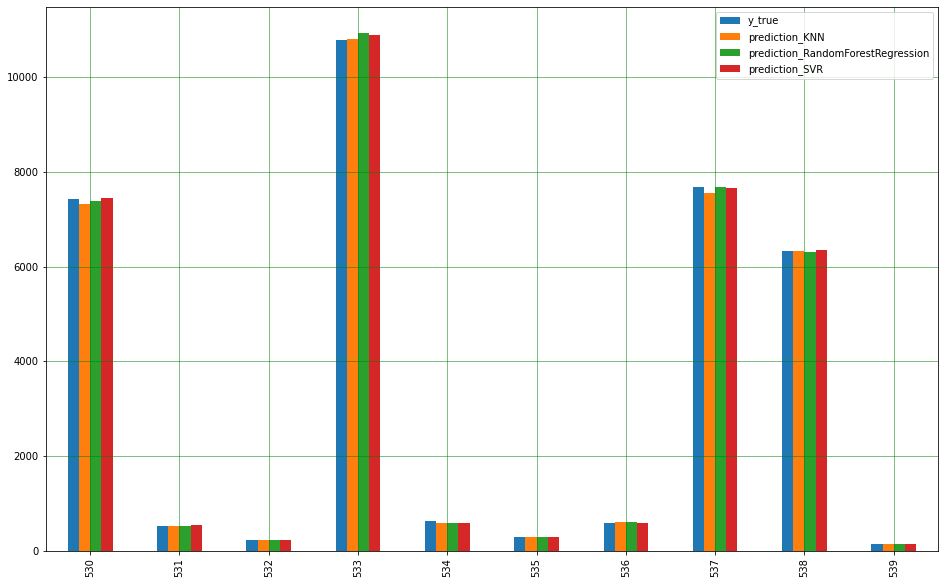

In [35]:
predictions = predictions.tail(10)
predictions.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()